In [1]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
import time
%matplotlib inline

In [112]:
dfinput1=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/Voltage_L1_DataSet2.csv',header=None)
dfoutput1=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/OutputFor_DataSet2.csv',header=None)

In [4]:
print(dfinput1.shape)
print(dfoutput1.shape)

(6000, 128)
(6000, 1)


## Data Viz

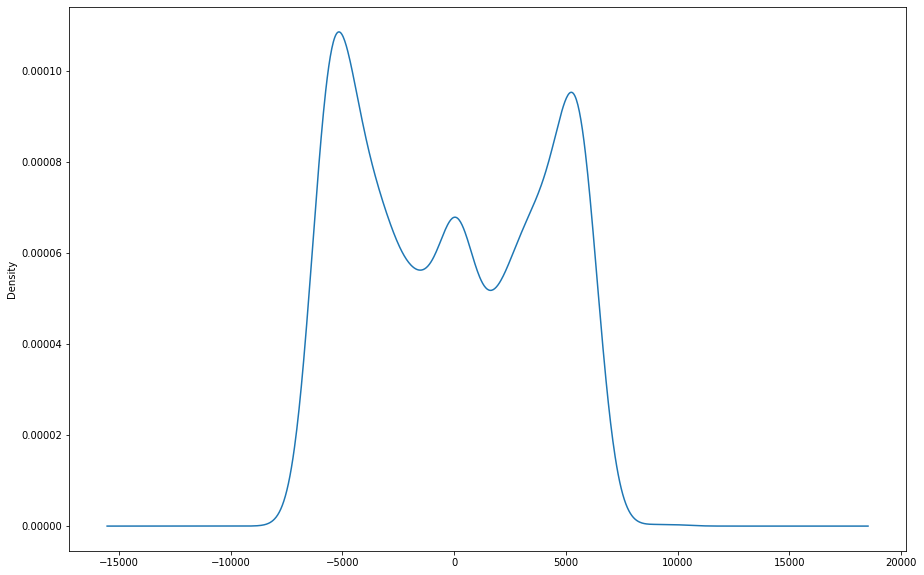

In [60]:
plt.figure(figsize=(15,10))
dfinput1.iloc[:,0].plot(kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


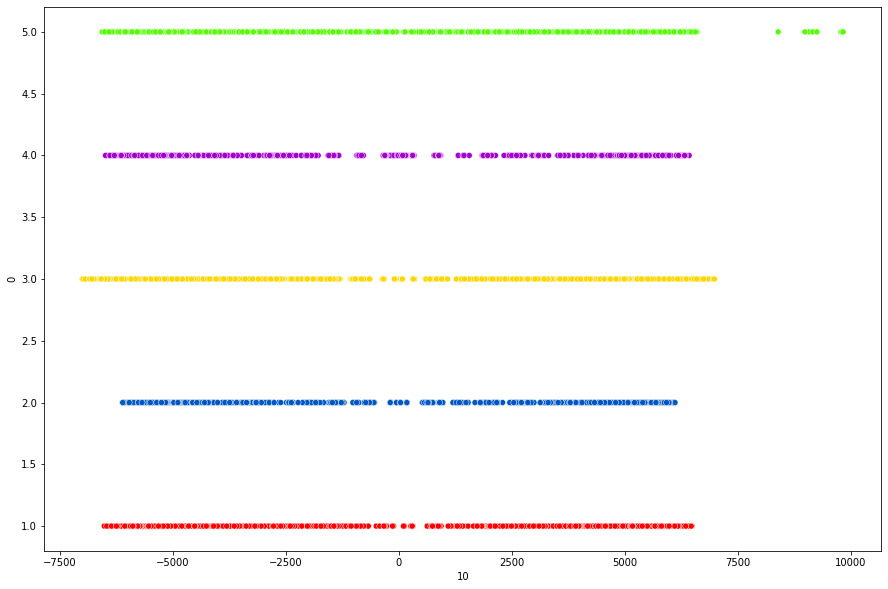

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfinput1.iloc[:,10],dfoutput1.iloc[:,0],cmap = 'prism',c=dfoutput1.iloc[:,0])

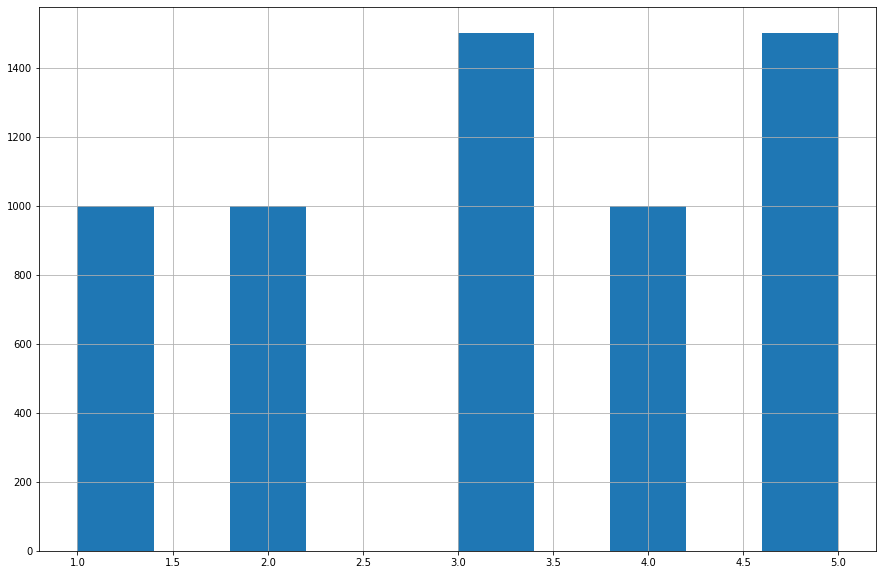

In [66]:
plt.figure(figsize=(15,10))
dfoutput1.iloc[:,0].hist()

## Functions

In [5]:
def data(dfinput1,dfoutput1):
  dfoutput1=pd.get_dummies(dfoutput1[0])
  x_train,x_test,y_train,y_test=train_test_split(dfinput1,dfoutput1,random_state=0,test_size=0.2)
  return x_train,x_test,y_train,y_test

In [199]:
def create_model(input_val,output_val):
  model=Sequential()
  model.add(Dense(64,activation='relu',input_shape=(input_val,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(256,activation='relu'))
  # model.add(Dropout(0.02))
  
  model.add(Dense(128,activation='relu'))
  
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))

  model.add(Dense(output_val,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adagrad')
  return model



In [200]:
def predict_model(x_test,y_test,model):  
  y_pred=model.predict(x_test)
  y_pred=pd.DataFrame(y_pred.round(),columns=list(y_test.columns))
  y_pred=y_pred.astype(int, errors='ignore')
  print(y_pred)
  print(classification_report(y_test,y_pred))
  return round(accuracy_score(y_test,y_pred),2)

In [201]:
x_train,x_test,y_train,y_test=data(dfinput1,dfoutput1)
model=create_model(x_train.shape[1],y_train.shape[1])
es = EarlyStopping(monitor='accuracy', mode='max')
history=model.fit(x_train,y_train,epochs=100,batch_size=5,callbacks=[es],validation_data=(x_test,y_test),verbose=2)
start = time.process_time()
print("Accuracy Score : ",predict_model(x_test,y_test,model))
print("Execution Time : ",round(time.process_time() - start),2)

Epoch 1/100
960/960 - 2s - loss: 4.9438 - accuracy: 0.5502 - val_loss: 1.5916 - val_accuracy: 0.7125
Epoch 2/100
960/960 - 2s - loss: 0.9553 - accuracy: 0.7521 - val_loss: 0.7858 - val_accuracy: 0.7833
Epoch 3/100
960/960 - 1s - loss: 0.5375 - accuracy: 0.8381 - val_loss: 0.5319 - val_accuracy: 0.8525
Epoch 4/100
960/960 - 1s - loss: 0.3655 - accuracy: 0.8779 - val_loss: 0.4338 - val_accuracy: 0.8300
Epoch 5/100
960/960 - 1s - loss: 0.2480 - accuracy: 0.9075 - val_loss: 0.3104 - val_accuracy: 0.8975
Epoch 6/100
960/960 - 2s - loss: 0.1958 - accuracy: 0.9258 - val_loss: 0.2113 - val_accuracy: 0.9200
Epoch 7/100
960/960 - 1s - loss: 0.1474 - accuracy: 0.9431 - val_loss: 0.1836 - val_accuracy: 0.9342
Epoch 8/100
960/960 - 2s - loss: 0.1085 - accuracy: 0.9567 - val_loss: 0.1709 - val_accuracy: 0.9433
Epoch 9/100
960/960 - 1s - loss: 0.0901 - accuracy: 0.9646 - val_loss: 0.1411 - val_accuracy: 0.9567
Epoch 10/100
960/960 - 2s - loss: 0.0723 - accuracy: 0.9735 - val_loss: 0.1422 - val_accura

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


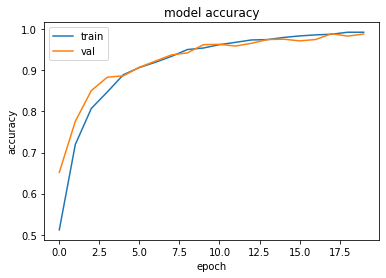

In [175]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

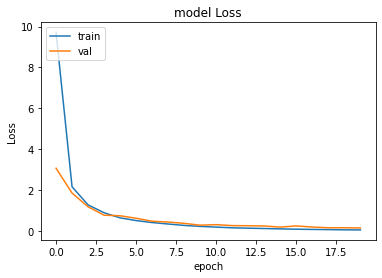

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [149]:
y_test.head()


,1,2,3,4,5
4320,1,0,0,0,0
2006,0,1,0,0,0
5689,1,0,0,0,0
472,0,0,1,0,0
1370,0,1,0,0,0


In [183]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_319 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_320 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_321 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_322 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_323 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_324 (Dense)            (None, 5)                 325       
Total params: 91,077
Trainable params: 91,077
Non-trainable params: 0
_________________________________________________

In [208]:
# model.save('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/mynewmodel.h5')

## New DataSet

In [202]:
dfinput2=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/Voltage_L1_train.csv',header=None)
dfoutput2=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/output_train.csv',header=None)

In [206]:
x_train,x_test,y_train,y_test=data(dfinput2,dfoutput2)
model1=create_model(x_train.shape[1],y_train.shape[1])
# es = EarlyStopping(monitor='accuracy', mode='max')
history=model1.fit(x_train,y_train,epochs=100,batch_size=10,validation_data=(x_test,y_test),verbose=2)


Epoch 1/100
480/480 - 2s - loss: 2.9968 - accuracy: 0.5746 - val_loss: 0.4978 - val_accuracy: 0.7567
Epoch 2/100
480/480 - 1s - loss: 0.3708 - accuracy: 0.8098 - val_loss: 0.1976 - val_accuracy: 0.8817
Epoch 3/100
480/480 - 1s - loss: 0.2308 - accuracy: 0.8748 - val_loss: 0.1919 - val_accuracy: 0.8842
Epoch 4/100
480/480 - 1s - loss: 0.1930 - accuracy: 0.8867 - val_loss: 0.1744 - val_accuracy: 0.8642
Epoch 5/100
480/480 - 1s - loss: 0.1535 - accuracy: 0.9025 - val_loss: 0.1456 - val_accuracy: 0.8983
Epoch 6/100
480/480 - 1s - loss: 0.1350 - accuracy: 0.9125 - val_loss: 0.1209 - val_accuracy: 0.9292
Epoch 7/100
480/480 - 1s - loss: 0.1267 - accuracy: 0.9190 - val_loss: 0.1129 - val_accuracy: 0.9292
Epoch 8/100
480/480 - 1s - loss: 0.1113 - accuracy: 0.9256 - val_loss: 0.0965 - val_accuracy: 0.9442
Epoch 9/100
480/480 - 1s - loss: 0.0995 - accuracy: 0.9321 - val_loss: 0.0907 - val_accuracy: 0.9425
Epoch 10/100
480/480 - 1s - loss: 0.0953 - accuracy: 0.9373 - val_loss: 0.0803 - val_accura

In [207]:
start = time.process_time()
print("Accuracy Score : ",predict_model(x_test,y_test,model1))
print("Execution Time : ",round(time.process_time() - start),2)

      1  2  3  4  5  6
0     0  0  0  0  1  0
1     0  0  1  0  0  0
2     0  0  0  0  0  1
3     1  0  0  0  0  0
4     0  1  0  0  0  0
...  .. .. .. .. .. ..
1195  1  0  0  0  0  0
1196  0  0  0  0  0  1
1197  0  0  0  0  1  0
1198  0  1  0  0  0  0
1199  0  0  0  0  1  0

[1200 rows x 6 columns]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       198
           1       1.00      0.97      0.99       187
           2       0.92      0.90      0.91       199
           3       0.99      0.99      0.99       194
           4       1.00      1.00      1.00       223
           5       0.98      0.99      0.99       199

   micro avg       0.97      0.97      0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200
 samples avg       0.96      0.97      0.96      1200

Accuracy Score :  0.95
Execution Time :  0 2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
# model1.save('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/mynewmodel_testdata.h5')

In [159]:
dfinputtest=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/Voltage_L1_test.csv',header=None)
dfoutputtest=pd.read_csv('/content/content/MyDrive/Colab Notebooks/dataset/Honeywell/output_test.csv',header=None)
dfoutputtest=pd.get_dummies(dfoutputtest[0])
start = time.process_time()
print("Accuracy Score : ",predict_model(dfinputtest,dfoutputtest,model1))
print("Execution Time : ",round(time.process_time() - start),2)

      1  2  3  4  5  6
0     1  0  0  0  0  0
1     1  0  0  0  0  0
2     1  0  0  0  0  0
3     1  0  0  0  0  0
4     1  0  0  0  0  0
...  .. .. .. .. .. ..
3595  0  0  0  0  0  1
3596  0  0  0  0  0  1
3597  0  0  0  0  0  1
3598  0  0  0  0  0  1
3599  0  0  0  0  0  1

[3600 rows x 6 columns]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       600
           1       0.99      1.00      0.99       600
           2       0.90      0.87      0.89       600
           3       0.98      1.00      0.99       600
           4       0.99      0.99      0.99       600
           5       0.98      1.00      0.99       600

   micro avg       0.96      0.97      0.96      3600
   macro avg       0.96      0.97      0.96      3600
weighted avg       0.96      0.97      0.96      3600
 samples avg       0.96      0.97      0.96      3600

Accuracy Score :  0.94
Execution Time :  0 2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Frequency Domain

In [164]:
from scipy.fft import fft
datafreq=dfinput1.copy()
datafreq=fft(datafreq)
x_train,x_test,y_train,y_test=data(datafreq,dfoutput1)
model2=create_model(x_train.shape[1],y_train.shape[1])
# es = EarlyStopping(monitor='accuracy', mode='max')
history=model2.fit(x_train,y_train,epochs=100,batch_size=5,validation_data=(x_test,y_test),verbose=2)
start = time.process_time()
print("Accuracy Score : ",predict_model(x_test,y_test,model2))
print("Execution Time : ",round(time.process_time() - start),2)


Epoch 1/100
960/960 - 2s - loss: 24.2617 - accuracy: 0.6562 - val_loss: 4.7504 - val_accuracy: 0.8083
Epoch 2/100
960/960 - 2s - loss: 3.5292 - accuracy: 0.8273 - val_loss: 5.1756 - val_accuracy: 0.8233
Epoch 3/100
960/960 - 2s - loss: 2.1282 - accuracy: 0.8671 - val_loss: 1.3612 - val_accuracy: 0.8725
Epoch 4/100
960/960 - 1s - loss: 1.4268 - accuracy: 0.8840 - val_loss: 0.5569 - val_accuracy: 0.8875
Epoch 5/100
960/960 - 1s - loss: 1.2234 - accuracy: 0.8983 - val_loss: 0.4419 - val_accuracy: 0.9617
Epoch 6/100
960/960 - 1s - loss: 1.0503 - accuracy: 0.9081 - val_loss: 2.1393 - val_accuracy: 0.8800
Epoch 7/100
960/960 - 2s - loss: 0.9711 - accuracy: 0.9038 - val_loss: 0.2757 - val_accuracy: 0.9642
Epoch 8/100
960/960 - 1s - loss: 0.8230 - accuracy: 0.9131 - val_loss: 0.5923 - val_accuracy: 0.9392
Epoch 9/100
960/960 - 2s - loss: 0.8536 - accuracy: 0.9096 - val_loss: 0.1988 - val_accuracy: 0.9692
Epoch 10/100
960/960 - 2s - loss: 0.6991 - accuracy: 0.9227 - val_loss: 0.2839 - val_accur

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pycaret

In [ ]:
# !pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [22]:
dataset=pd.concat([dfinput1, dfoutput1], axis=1, ignore_index=True)
dataset.rename(columns={128: "target"},inplace=True)

In [24]:
dataset.to_csv('Honeywelldataset2.csv')

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 129)
Unseen Data For Predictions: (600, 129)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original Data,"(5400, 129)"
5,Missing Values,False
6,Numeric Features,128
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9706,0.9943,0.9645,0.9724,0.9701,0.9628,0.9634,0.093
et,Extra Trees Classifier,0.8804,0.9775,0.8792,0.8861,0.8824,0.8489,0.8493,0.951
lightgbm,Light Gradient Boosting Machine,0.8778,0.9798,0.8762,0.8832,0.8794,0.8456,0.8462,7.017
rf,Random Forest Classifier,0.8608,0.9690,0.8585,0.8657,0.8621,0.8240,0.8246,2.773
knn,K Neighbors Classifier,0.7481,0.9499,0.7813,0.8397,0.7398,0.6875,0.7112,0.175
dt,Decision Tree Classifier,0.7367,0.8341,0.7441,0.7465,0.7385,0.6684,0.6702,0.543
gbc,Gradient Boosting Classifier,0.7359,0.9205,0.7299,0.7256,0.7263,0.6653,0.6675,52.287
lr,Logistic Regression,0.5885,0.8433,0.5707,0.5805,0.5501,0.4810,0.4948,3.000
lda,Linear Discriminant Analysis,0.5292,0.7345,0.4760,0.5870,0.4680,0.3824,0.4755,0.135
ridge,Ridge Classifier,0.5134,0.0000,0.4636,0.4567,0.4396,0.3611,0.4143,0.039


In [ ]:
dt = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9709,0.9887,0.9648,0.9722,0.9707,0.9631,0.9635
1,0.9815,1.0000,0.9770,0.9826,0.9812,0.9766,0.9769
2,0.9577,0.9877,0.9502,0.9600,0.9569,0.9464,0.9471
3,0.9709,0.9937,0.9663,0.9725,0.9704,0.9632,0.9637
4,0.9630,0.9907,0.9548,0.9650,0.9624,0.9531,0.9537
5,0.9735,0.9995,0.9672,0.9756,0.9729,0.9665,0.9672
6,0.9815,1.0000,0.9774,0.9824,0.9812,0.9766,0.9769
7,0.9735,0.9935,0.9677,0.9745,0.9733,0.9665,0.9668
8,0.9630,0.9944,0.9546,0.9652,0.9621,0.9531,0.9539
9,0.9708,0.9944,0.9651,0.9735,0.9703,0.9631,0.9639


In [ ]:
print(dt)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9259,0.9845,0.9129,0.9342,0.9213,0.9061,0.9092
1,0.9365,0.9900,0.9260,0.9434,0.9332,0.9195,0.9220
2,0.9233,0.9729,0.9131,0.9319,0.9191,0.9026,0.9059
3,0.9339,0.9795,0.9227,0.9418,0.9302,0.9162,0.9191
4,0.9259,0.9845,0.9141,0.9338,0.9211,0.9061,0.9092
5,0.9127,0.9822,0.8989,0.9227,0.9063,0.8892,0.8931
6,0.9339,0.9830,0.9237,0.9399,0.9298,0.9162,0.9187
7,0.9339,0.9911,0.9180,0.9461,0.9288,0.9163,0.9204
8,0.9339,0.9886,0.9215,0.9417,0.9296,0.9162,0.9192
9,0.9363,0.9847,0.9259,0.9425,0.9328,0.9193,0.9217


In [ ]:
print(tuned_dt)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)


In [ ]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)


In [ ]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,target,Label,Score
0,5534.138053,5395.898976,5186.251418,4924.421624,4631.464792,4323.859863,4009.847091,3692.171624,3363.511349,3012.878248,2622.879504,2183.443929,1689.079864,1141.616678,552.956535,-56.759546,-664.645648,-1482.178330,-1999.430047,-2461.752253,-2870.976278,-3236.257046,-3573.157525,-3893.578975,-4208.507329,-4519.774591,-4822.800954,-5099.279051,-5331.814147,-5502.095036,-5590.897518,-5590.897209,-5501.179786,-5330.897941,-5097.448475,-4820.055248,-4519.774182,-4208.507112,-3892.663354,-3571.326852,...,-5100.194872,-5332.728930,-5502.095074,-5590.897345,-5590.897677,-5501.179032,-5330.898420,-5096.533335,-4818.224281,-4517.943199,-4206.676264,-3891.748197,-3570.411265,-3234.425562,-2867.314123,-2459.005923,-1995.768239,-1477.600680,-910.912248,-311.266421,301.197018,901.758419,1468.446989,1985.698889,2448.020913,2856.329222,3222.526010,3558.510431,3879.847783,4193.860201,4506.042306,4808.154800,5085.548312,5318.082271,5487.448225,5576.250464,5574.419599,3,5,1.0
1,-2305.203618,-2767.526188,-3248.158814,-3636.326240,-4059.282666,-4414.493080,-4663.506056,-4906.111335,-5110.264957,-5236.602985,-5336.391369,-5367.518363,-5403.221891,-5383.996709,-5317.165945,-5150.546427,-4932.660464,-4679.985227,-4373.295859,-4054.705016,-3657.382268,-3240.834497,-2793.159966,-2279.569940,-1810.838773,-1312.812793,-758.940429,-270.984297,290.210518,792.814848,1302.742887,1847.459801,2325.345023,2806.893501,3267.384510,3631.749295,4031.818782,4337.592911,4652.521179,4933.576117,...,-270.069138,61.338701,0.000388,36.620260,47.605809,64.085247,76.901563,91.549025,102.534971,115.352165,126.338349,136.408215,143.732045,151.056804,152.887695,156.549274,157.464461,158.380117,157.464691,155.633526,150.141153,143.732621,136.408903,126.338509,117.183135,104.366001,92.465380,79.648076,64.085073,49.436548,32.957709,16.479650,0.916332,-15.563014,-31.126059,-45.774201,-63.168397,4,4,1.0
2,796.411466,1320.985233,1842.421367,2340.600560,2810.875720,3256.339132,3686.518991,4068.109877,4401.469722,4713.006808,4959.782438,5176.789676,5342.597414,5436.938849,5495.776080,5490.755285,5437.265484,5333.109030,5189.069037,4980.229551,4725.931105,4427.202914,4090.964275,3716.295151,3294.696333,2842.219386,2373.231979,1875.674294,1361.784521,827.631507,305.769087,-239.124577,-771.137457,-1298.946129,-1830.043678,-2329.520126,-2806.033495,-3253.824981,-3665.255769,-4048.058651,...,1870.000755,1361.143739,844.601863,299.479707,-239.230270,-771.431531,-1313.288036,-1827.123897,-2330.609330,-2796.506243,-3239.252414,-3667.896609,-4052.471100,-4397.941528,-4695.778106,-4943.553811,-3183.194814,-4918.856429,-5219.773105,-5474.800725,-5484.146855,-5423.543705,-5324.905987,-5173.416405,-4959.059398,-4716.268240,-4416.524027,-4067.092860,-3699.386019,-3283.036311,-2838.340155,-2357.705717,-1856.549566,-1345.717657,-806.762944,-286.947397,269.024976,5,5,1.0
3,3170.001104,2635.941803,2075.855983,1495.991081,901.550537,298.782083,-307.109330,-909.878492,-1505.359123,-2085.225331,-2645.310313,-3180.410507,-3684.278958,-4152.752012,-4581.665014,-4966.854843,-5303.113610,-5592.526523,-5823.639693,-5999.577126,-6119.298063,-6178.637638,-6179.678882,-6120.339373,-6002.700529,-5826.762727,-5594.608195,-5309.359804,-4976.224330,-4588.952429,-4162.122258,-3693.648726,-3189.780142,-2655.720562,-2095.635153,-1515.769799,-921.329487,-317.520510,288.371280,892.181111,...,-5309.360225,-4976.223837,-4588.952615,-4162.122054,-3693.648775,-3189.780047,-2655.720513,-2095.635578,-1515.769948,-921.329290,-318.561573,288.371733,891.140392,1486.621176,2066.486620,2627.613423,3162.713820,3666.582774,4136.096921,4563.968385,4949.157843,5285.416762,5574.829631,5805.942963,5981.880308,6101.601206,6160.940684,6160.941255,6101.601277,5983.96187

In [ ]:
Y_TEST=unseen_predictions['target']
Y_PRED=unseen_predictions['Label']

In [ ]:
accuracy_score(Y_TEST,Y_PRED)

0.915

In [ ]:
save_model(final_dt,'Final DT Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='target')),
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), (